In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/deepeshnathani/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


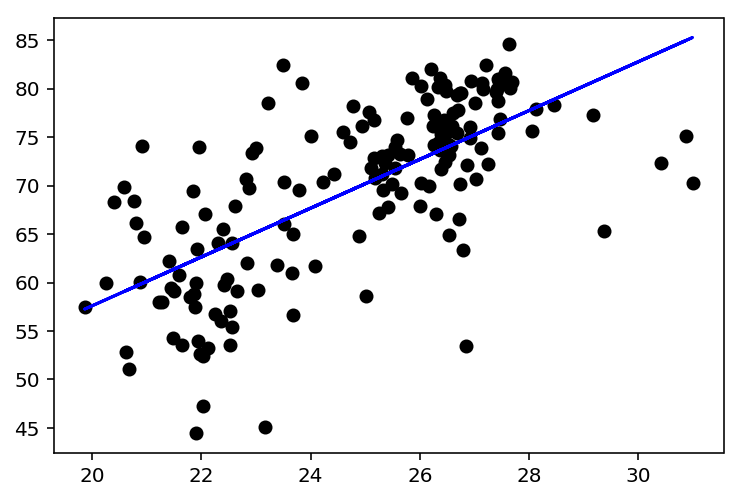

In [43]:
# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
plt.scatter(bmi_life_data["BMI"], bmi_life_data["Life expectancy"], color = "black")

# Make and fit the linear regression model
total_rows = bmi_life_data.shape[0]
y = bmi_life_data["Life expectancy"].values.reshape(total_rows, 1)
X = bmi_life_data["BMI"].values.reshape(total_rows, 1)

bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([21.07931])
plt.plot(X, bmi_life_model.predict(X), color = "blue")

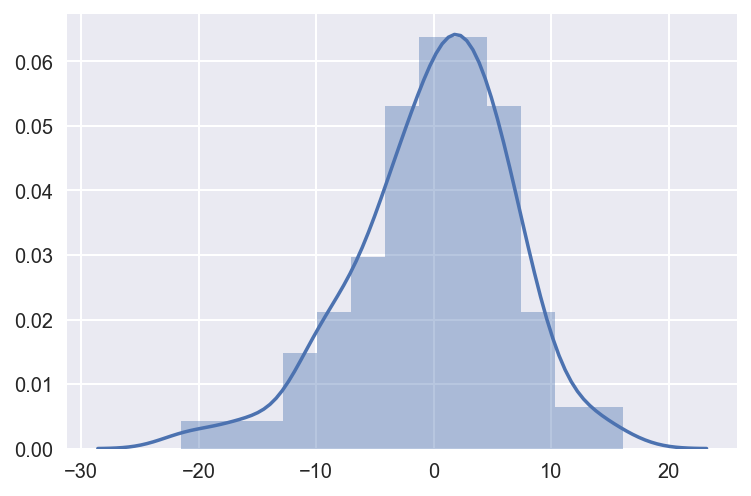

In [45]:
# Lets plot the error ditribution for the model (y_true - y_pred)
y_true = y
y_pred = bmi_life_model.predict(X)

sns.distplot(y_true - y_pred)

In [33]:
spring_owl_data = pd.read_csv("/Users/deepeshnathani/Downloads/Sample.csv")
#list(spring_owl_data.columns.values)

# Drop rows with null values
spring_owl_data = spring_owl_data.dropna()
num_rows = spring_owl_data.shape[0]

# Construct Response and Predictor Variables

'''
y = SHARE_PERFORMANCET1 (Total Campaign Returns)
x1 = INTERVAL_AVG (Avg Daily Turnover of company)
x2 = NET_DEBT_TO_EBITDA (Total Debt / EBITA(earning potential of the business))
x3 = CURRENT_EV_TO_T12M_EBITDA (Enterprise Value/ EBITA)
x4 = PE_RATIO (Stock Price / Earnings per share ratio)
x5 = PX_TO_BOOK_RATIO (Stock Price / Its Book Value)
x6 = PX_TO_CASH_FLOW (Used to compare market value to cash flow)
x7 = FREE_CASH_FLOW_YIELD (Overall return evaluation ratio of stock)
x8 = CUR_MKT_CAP (Market value of shares)
x9 = CURR_ENTP_VAL (Market Value + Debt + Interests etc.)
x10 = ISS_QUALITYSCORE (Scoring mechanism for investors to consult. Reviews Board Structure, Compensation Program etc.)
'''
y = spring_owl_data["SHARE_PERFORMANCET1"].values.reshape(num_rows, 1)

x1 = spring_owl_data["INTERVAL_AVG"].values.reshape(num_rows, 1)
x2 = spring_owl_data["NET_DEBT_TO_EBITDA"].values.reshape(num_rows, 1)
x3 = spring_owl_data["CURRENT_EV_TO_T12M_EBITDA"].values.reshape(num_rows, 1)
x4 = spring_owl_data["PE_RATIO"].values.reshape(num_rows, 1)
x5 = spring_owl_data["PX_TO_BOOK_RATIO"].values.reshape(num_rows, 1)
x6 = spring_owl_data["PX_TO_CASH_FLOW"].values.reshape(num_rows, 1)
x7 = spring_owl_data["FREE_CASH_FLOW_YIELD"].values.reshape(num_rows, 1)
x8 = spring_owl_data["CUR_MKT_CAP"].values.reshape(num_rows, 1)
x9 = spring_owl_data["CURR_ENTP_VAL"].values.reshape(num_rows, 1)
x10 = spring_owl_data["ISS_QUALITYSCORE"].values.reshape(num_rows, 1)

d = {#"INTERVAL_AVG": pd.Series(spring_owl_data["INTERVAL_AVG"]),
 "SHARE_PERFORMANCET1": pd.Series(spring_owl_data["SHARE_PERFORMANCET1"]),
 "NET_DEBT_TO_EBITDA": pd.Series(spring_owl_data["NET_DEBT_TO_EBITDA"]),
 "CURRENT_EV_TO_T12M_EBITDA": pd.Series(spring_owl_data["CURRENT_EV_TO_T12M_EBITDA"]),
 "PE_RATIO": pd.Series(spring_owl_data["PE_RATIO"]),
 "PX_TO_BOOK_RATIO": pd.Series(spring_owl_data["PX_TO_BOOK_RATIO"]),
 "PX_TO_CASH_FLOW": pd.Series(spring_owl_data["PX_TO_CASH_FLOW"]),
 "FREE_CASH_FLOW_YIELD": pd.Series(spring_owl_data["FREE_CASH_FLOW_YIELD"]),
 "CUR_MKT_CAP": pd.Series(spring_owl_data["CUR_MKT_CAP"]),
 "CURR_ENTP_VAL": pd.Series(spring_owl_data["CURR_ENTP_VAL"])}
 #"ISS_QUALITYSCORE": pd.Series(spring_owl_data["ISS_QUALITYSCORE"])}

df = pd.DataFrame(d)
# df = df[df.INTERVAL_AVG != 'N.A.']
df = df[df.NET_DEBT_TO_EBITDA != 'N.A.']
df = df[df.CURRENT_EV_TO_T12M_EBITDA != 'N.A.']
df = df[df.PE_RATIO != 'N.A.']
df = df[df.PX_TO_BOOK_RATIO != 'N.A.']
df = df[df.PX_TO_CASH_FLOW != 'N.A.']
df = df[df.FREE_CASH_FLOW_YIELD != 'N.A.']
df = df[df.CUR_MKT_CAP != 'N.A.']
df = df[df.CURR_ENTP_VAL != 'N.A.']

df = df.apply(pd.to_numeric, errors='coerce')

result = sm.ols(formula="SHARE_PERFORMANCET1 ~ NET_DEBT_TO_EBITDA + CURRENT_EV_TO_T12M_EBITDA + PE_RATIO + PX_TO_BOOK_RATIO + PX_TO_CASH_FLOW + FREE_CASH_FLOW_YIELD + CUR_MKT_CAP + CURR_ENTP_VAL",
                data=df[:80]).fit()
# print(result.summary()
y_actual = df["SHARE_PERFORMANCET1"][80:]
df = df.drop('SHARE_PERFORMANCET1', 1)
y_pred = result.predict(df[80:])

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_pred))
print(rms)

39.6114006233844


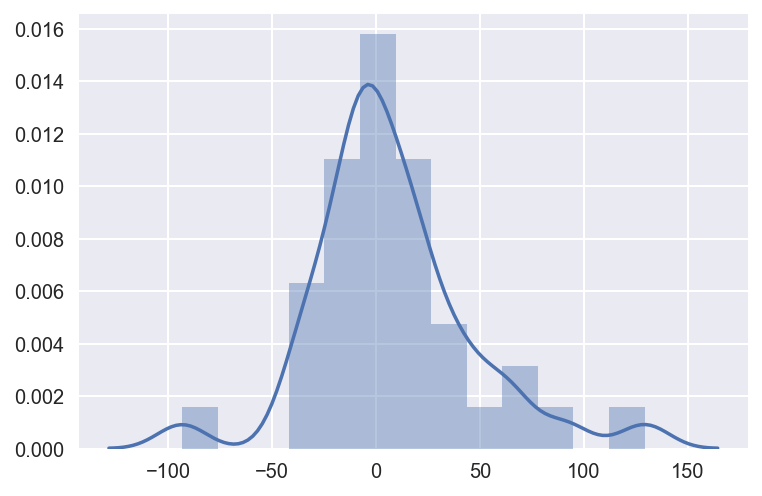

In [31]:
#print(y_actual - y_pred)
sns.distplot(y_actual - y_pred)

    CURRENT_EV_TO_T12M_EBITDA  CURR_ENTP_VAL  CUR_MKT_CAP  \
19                    11.9786     10601.0991    6606.0991   
25                    16.5397      2653.3561    2670.3711   

    FREE_CASH_FLOW_YIELD  NET_DEBT_TO_EBITDA  PE_RATIO  PX_TO_BOOK_RATIO  \
19                6.3208              4.5141   60.0141            7.8664   
25                7.7153             -0.1061   40.0764            2.2124   

    PX_TO_CASH_FLOW  
19          13.3892  
25          10.4319  
